### Sprint 7. Algoritmes d’aprenentatge supervisat: Classificació

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Obrim l'arxiu i li assignem les columnes corresponents.

In [4]:
data = pd.read_csv('wineData.txt')
data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data.columns
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
data.shape

(177, 14)

Mostrem informació sobre les dades de les columnes.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

### - Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

#### Model 1: Logistic Regression

Primer farem un model de regressió logística Multinomial, doncs la variable objectiu, la classe de vi, té 3 categories.Aquest model posteriorment podrem fer servir com a linia de base en cas de voler millorar-ho amb un altre tipus de model. 

In [7]:
# Escollim la variable objectiu
y = data['Class']
# Escollim les variables independents treient la variable objectiu.
# X = data.drop(columns='Class')
X = data.drop(['Class'], axis = 1)

A continuació dividirem les dades en un set d'entrenament i un altre de test en proporció 80% i 20%

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [9]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (141, 13)
X_test.shape:  (36, 13)
y_train.shape:  (141,)
y_test.shape:  (36,)


Fem el model de regressió logística i l'entrenem amb les dades del set d'entrenament.

In [10]:
clf =  LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
 
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

A continuació comprovarem quina precisió ens dona tant el set d'entrenament com el de test.

In [12]:
score = clf.score(X_train,y_train)*100
print("Precisió del set d'entrenament: ", round(score, 4), "%")

preds = clf.predict(X_test)
score_pred = accuracy_score(y_test, preds) *100
print("Precisió del set de test: ", round(score_pred,4), "%")

Precisió del set d'entrenament:  98.5816 %
Precisió del set de test:  94.4444 %


Veiem que la precissió del test d'entrenament és  del 98.5% mentres que la del set de test es del 94.4%, així doncs les prediccions haurien de ser molt acurades.

Ara farem un informe que ens mostrarà algunes mètriques segmentades segons la classe:

In [14]:
target_names = ['classe 1', 'classe 2', 'classe 3']
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

    classe 1       1.00      1.00      1.00        14
    classe 2       0.93      0.93      0.93        15
    classe 3       0.86      0.86      0.86         7

    accuracy                           0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36



In [15]:
def print_results(true, predicted): 
    accuracy = accuracy_score(true, predicted)
    zero_log_loss = metrics.zero_one_loss(true, predicted)
    #hamming_log_loss = metrics.hamming_loss(true, predicted)
    recall = recall_score(true, predicted, average='weighted')
    f1score = f1_score(true, predicted, average='weighted')
    precision = metrics.precision_score(true, predicted, average='weighted')
    
    print('Accuracy : ', accuracy)
    print('Recall (or sensitivity): ', recall)
    print('F1 score: ', f1score)
    print('Precision : ', precision)
    print("zero_one_loss", zero_log_loss)
    #print("hamming_loss",hamming_log_loss)

In [16]:
print_results(y_test, preds)

Accuracy :  0.9444444444444444
Recall (or sensitivity):  0.9444444444444444
F1 score:  0.9444444444444444
Precision :  0.9444444444444444
zero_one_loss 0.05555555555555558


A continuació farem una matriu de confusió que compara les dades reals amb les predites.

In [17]:
log_matrix = confusion_matrix(y_test, preds)
print('Matriu de Confusió:')
print(log_matrix)

Matriu de Confusió:
[[14  0  0]
 [ 0 14  1]
 [ 0  1  6]]


Creem una funció que imprimeixi els verdaders i falsos per a cada classe a partir de la matriu de confusió.

In [18]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    C1V = cm[0][0]
    C2F1 = cm[0][1]
    C3F1 = cm[0][2]
    C1F2 = cm[1][0]
    C2V = cm[1][1]
    C3F2 = cm[1][2]
    C1F3 = cm[2][0]
    C2F3 = cm[2][1]
    C3V = cm[2][2]
    
    print('Clase 1 Verdaders = ', C1V )
    print('clase 2 Verdaders = ', C2V )
    print('Clase 3 Verdaders = ', C3V )
    print('Clase 1 Fals = ', C1F2+C1F3 )
    print('clase 2 Fals = ', C2F1+C2F3 )
    print('Clase 3 Fals = ', C3F1+C3F2 ) 

Imprimim els resultats.

In [19]:
print_confusion_matrix(y_test, preds)

Clase 1 Verdaders =  14
clase 2 Verdaders =  14
Clase 3 Verdaders =  6
Clase 1 Fals =  0
clase 2 Fals =  1
Clase 3 Fals =  1


Obtenim 34 resultats correctes i tan sols 2 incorrectes. Lo que ens confirma que realment la precisió en les prediccions es molt alta. 

Finalment guardarem els resultats de les metriques del nostre model.

In [20]:
def get_results(true, predicted): 
    accuracy = accuracy_score(true, predicted)
    recall = recall_score(true, predicted, average='weighted')
    f1score = f1_score(true, predicted, average='weighted')
    precision = metrics.precision_score(true, predicted, average='weighted')
    zero_log_loss = metrics.zero_one_loss(true, predicted)
    return accuracy, recall, precision, f1score, zero_log_loss

In [28]:
results_df = pd.DataFrame(data= [['Logistic Regression',  get_results(y_test, preds)[0],
                                  get_results(y_test, preds)[1],  get_results(y_test, preds)[2], 
                                  get_results(y_test, preds)[3], 
                                  get_results(y_test, preds)[4]]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss'])

results_df

,Model,Accuracy,Recall,Precision,f1-score,zero_one_loss
0,Logistic Regression,0.944444,0.944444,0.944444,0.944444,0.055556


#### Model 2: AdaBoost

A continuació mirarem de millorar les prediccions tot fent servir un altre model que es diu AdaBoost.

Farem servir les dades del set d'entrenament que hem emprat a l'anterior model per entrenar l'actual.

In [21]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=0, n_estimators=100)

ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

A continuació mirarem quina precisió ens dona.

In [22]:
score = ada.score(X_train,y_train)*100
print("Precisió del set d'entrenament: ",  round(score, 4), "%")

ada_pred = ada.predict(X_test)
score_pred = accuracy_score(y_test, ada_pred)*100
print("Precisió del set de test: ",  round(score_pred, 4), "%")

Precisió del set d'entrenament:  99.2908 %
Precisió del set de test:  94.4444 %


In [23]:
target_names = ['classe 1', 'classe 2', 'classe 3']
print(classification_report(y_test, ada_pred, target_names=target_names))

              precision    recall  f1-score   support

    classe 1       0.93      1.00      0.97        14
    classe 2       0.93      0.93      0.93        15
    classe 3       1.00      0.86      0.92         7

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [24]:
print_results(y_test, ada_pred)

Accuracy :  0.9444444444444444
Recall (or sensitivity):  0.9444444444444444
F1 score:  0.9438549955791335
Precision :  0.9462962962962962
zero_one_loss 0.05555555555555558


Si ens fixem en la l'accuracy i el recall veiem que no millora respecte la regressió logística. només millora lleugerament al set d'entrenament del qual n'hi ha moltes més dades, però en relació al set de test, amb una quantitat de dades molt limitada, l'accuracy, el recall i la perdua(Zero_one_loss) resta igual que al model de regressió logística. Només millora molt lleugerament la precisió, en un 0.18%

A continuació farem una matriu de confusió que compara les dades reals amb les predites.

In [25]:
ada_matrix = confusion_matrix(y_test, ada_pred)
print('Matriu de Confusió:')
print(ada_matrix)

Matriu de Confusió:
[[14  0  0]
 [ 1 14  0]
 [ 0  1  6]]


imprimim els resultats verdaders i falsos per a cada classe a partir de la matriu de confusió.

In [26]:
print_confusion_matrix(y_test, ada_pred)

Clase 1 Verdaders =  14
clase 2 Verdaders =  14
Clase 3 Verdaders =  6
Clase 1 Fals =  1
clase 2 Fals =  1
Clase 3 Fals =  0


De la meteixa manera que en el model anterior, obtenim 34 resultats correctes i  2 incorrectes. Per lo que no ens ha millorat la predicció. 

In [29]:
results_df2 = pd.DataFrame(data= [['AdaBoost',  get_results(y_test, ada_pred)[0],
                                  get_results(y_test, ada_pred)[1],  get_results(y_test, ada_pred)[2], 
                                  get_results(y_test, ada_pred)[3], 
                                  get_results(y_test, ada_pred)[4]]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss'])
results_df = pd.concat([results_df, results_df2])
results_df2

,Model,Accuracy,Recall,Precision,f1-score,zero_one_loss
0,AdaBoost,0.944444,0.944444,0.946296,0.943855,0.055556


### - Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [30]:
plot_results = results_df.set_index('Model')
plot_results

,Accuracy,Recall,Precision,f1-score,zero_one_loss
Model,,,,,
Logistic Regression,0.944444,0.944444,0.944444,0.944444,0.055556
AdaBoost,0.944444,0.944444,0.946296,0.943855,0.055556


Com podem veure a la taula, les metriques d'ambdos models son pràcticament idèntiques. només hi ha una lleugera millora en el model AdaBoost en quant a la precisió d'un 0.18%, mentre que el f1-score empitjora un 0.06%.

Ara farem una gràfica per comparar aquestes dades.

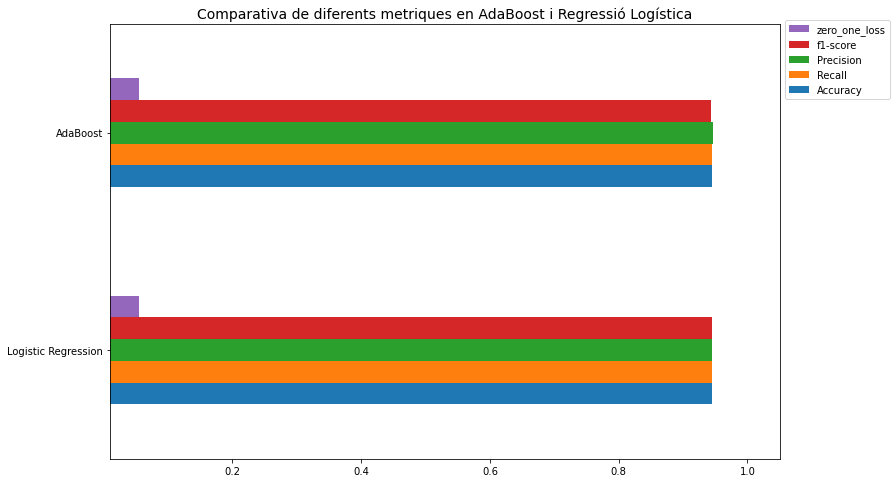

In [51]:
ax = plot_results[['Accuracy', 'Recall', 'Precision', 'f1-score','zero_one_loss']].plot(kind='barh', figsize=(12, 8))
ax.set_title('Comparativa de diferents metriques en AdaBoost i Regressió Logística', fontsize = 14)
ax.set_ylabel('')
ax.set_xlim([0.01, 1.05])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

en aquesta gràfica es pot veure visualment com son ambdos models practicament idèntics, on només s'aprecia l'esmentada lleugera millora per part del model AdaBoost en quant a la precisió.

Farem també una gràfica de les matrius de confusió d'amdos models per comparar-les.

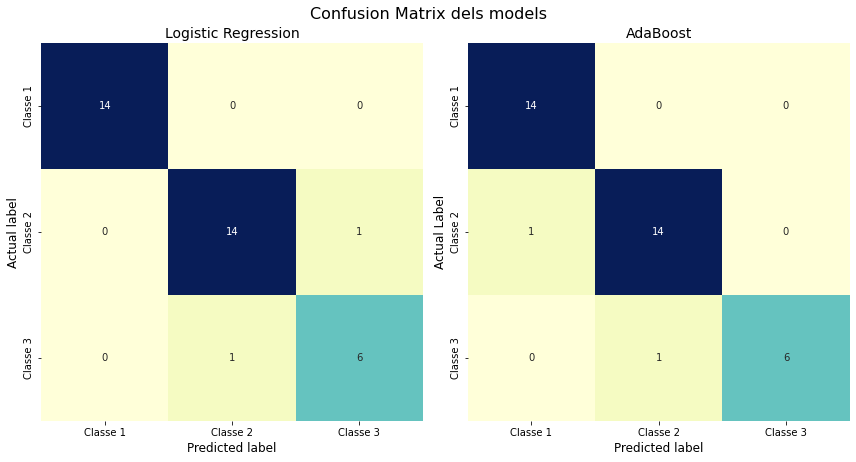

In [38]:
fig = plt.figure(figsize = (12, 12))
fig.add_axes((0.1, 0.1, 0.5, 0.5))
plt.suptitle('Confusion Matrix dels models', fontsize = 16)
labels = ['Classe 1', 'Classe 2', 'Classe 3']

plt.subplot(2,2,1)
sns.heatmap(pd.DataFrame(log_matrix), annot = True ,fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Logistic Regression', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

plt.subplot(2,2,2)
sns.heatmap(pd.DataFrame(ada_matrix), annot = True, fmt='g', cbar = False,  cmap="YlGnBu" , xticklabels= labels, 
            yticklabels= labels)
plt.title('AdaBoost', fontsize = 14)
plt.ylabel('Actual Label', fontsize = 12)
plt.xlabel('Predicted label', fontsize = 12);

plt.tight_layout()

Veiem que de la mateixa manera que ens mostra la gràfica comparativa anterior, son gairebé iguals. Només varia un fals positiu que en el model de regressió logística és a la Classe 3 i a l'AdaBoost a la Classe 1. 

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

#### Logistic Regression

Primer de tot veurem quins parametres té aquest model.

In [183]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

A continuació farem servir GridSearch per trobar els millors paràmetres per al nostre model.

In [195]:
cv = StratifiedKFold(n_splits=10, random_state=0)
# definim els parametres a buscar
space = dict()
space['solver'] = ['newton-cg', 'sag', 'lbfgs' ]
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['max_iter'] = [50, 100, 200, 300, 400, 500, 800, 1000]
# definim la cerca
search = GridSearchCV(clf, space, scoring='accuracy', cv=cv, n_jobs = -1, refit= True)
result = search.fit(X_train, y_train)
# imprimim els resultats
print('Millor resultat: %s' % result.best_score_)
print('Millors Hiperparametres: %s' % result.best_params_)

Millor resultat: 0.978723404255
Millors Hiperparametres: {'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}


Com podem veure, el resultat dels millors paràmetres que hem seleccionat per la cerca coincideixen amb els que venen per defecte al model, així doncs en aquest cas no cal modificar-los per obtenir el millor resultat.

#### AdaBoost

Mirem quins parametres té aquest model.

In [185]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 0}

Tal i com hem fet amb el model anterior, farem servir GridSearch per trobar els paràmetres òptims.

In [190]:
# definim els parametres a buscar
estimators = [100, 200, 500, 800, 1000]
grid = dict(n_estimators = estimators)
cv = StratifiedKFold(n_splits = 10, random_state=0)
# definim la cerca
grid_search = GridSearchCV(estimator = ada, param_grid=grid, cv = cv, scoring = 'accuracy', error_score=0 )
grid_result_ada = grid_search.fit(X_train, y_train)
# imprimim els resultats
print('Millor resultat: %s' % grid_result_ada.best_score_)
print('Millors Hiperparametres: %s' % grid_result_ada.best_params_)

Millor resultat: 0.943262411348
Millors Hiperparametres: {'n_estimators': 100}


Igual que succeeix amb l'anterior model el paràmetre que ve per defecte es igual que al resultat de la cerca amb GridSearch, de manera que no caldria modificar-lo.

### - Exercici 4

Compara el seu rendiment fent servir l'aproximació train/test o cross-validation.

#### Logistic Regression

A continuació veurem quin resultats ens dona el nostre model amb la validació creuada.<br>
Farem servir StratifiedKFold, doncs es recomanable fer-lo servir en problemes de classificació, donat que ens garanteix que la proporció de mostres en cada categoria sigui consistent amb el conjunt de dades originals  tant en el set d'entrenament com en el de test.

In [42]:
skf = StratifiedKFold(n_splits=10)

#score_acc = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")*100

preds_lr_cv= cross_val_predict(clf, X, y, cv=skf)
score_pred_cv = accuracy_score(y, preds_lr_cv)*100
print("Precisió de les prediccions: ", round(score_pred_cv,4), "%")

Precisió de les prediccions:  96.6102 %


Veiem que la precisió en les prediccions ha millorat un 2.2% en relació amb el train/test.

In [475]:
print_results(y, preds_lr_cv)

Accuracy :  0.966101694915
Recall (or sensitivity):  0.966101694915
F1 score:  0.966019363206
Precision :  0.966196291622
zero_one_loss 0.0338983050847


Ara farem un informe que ens mostrarà algunes mètriques segmentades segons la classe:

In [43]:
target_names = ['classe 1', 'classe 2', 'classe 3']
print(classification_report(y, preds_lr_cv, target_names=target_names))

              precision    recall  f1-score   support

    classe 1       0.97      0.98      0.97        58
    classe 2       0.97      0.94      0.96        71
    classe 3       0.96      0.98      0.97        48

    accuracy                           0.97       177
   macro avg       0.97      0.97      0.97       177
weighted avg       0.97      0.97      0.97       177



Guardem els resultats.

In [47]:
compare_df = pd.DataFrame(data= [['Logistic Regression cv',  get_results(y, preds_lr_cv)[0],
                                  get_results(y, preds_lr_cv)[1],  get_results(y, preds_lr_cv)[2], 
                                  get_results(y, preds_lr_cv)[3], get_results(y, preds_lr_cv)[4]]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss'])

compare_df

,Model,Accuracy,Recall,Precision,f1-score,zero_one_loss
0,Logistic Regression cv,0.966102,0.966102,0.966196,0.966019,0.033898


#### AdaBoost

In [44]:
skf = StratifiedKFold(n_splits=10)

#score_acc = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")*100

preds_ada_cv= cross_val_predict(ada, X, y, cv=skf)
score_pred_cv = accuracy_score(y, preds_ada_cv)*100
print("Precisió de les prediccions: ", round(score_pred_cv,4), "%")

Precisió de les prediccions:  89.8305 %


En aquest cas la precisió de les prediccions lluny de millorar ha empitjorat un 4.5%.

In [45]:
print_results(y, preds_ada_cv)

Accuracy :  0.8983050847457628
Recall (or sensitivity):  0.8983050847457628
F1 score:  0.8979714633484357
Precision :  0.9048219382802418
zero_one_loss 0.10169491525423724


In [46]:
target_names = ['classe 1', 'classe 2', 'classe 3']
print(classification_report(y, preds_ada_cv, target_names=target_names))

              precision    recall  f1-score   support

    classe 1       0.93      0.95      0.94        58
    classe 2       0.84      0.93      0.88        71
    classe 3       0.97      0.79      0.87        48

    accuracy                           0.90       177
   macro avg       0.91      0.89      0.90       177
weighted avg       0.90      0.90      0.90       177



Guardem els resultats.

In [48]:
results_df4 = pd.DataFrame(data= [['AdaBoost cv',  get_results(y, preds_ada_cv)[0],
                                  get_results(y, preds_ada_cv)[1],  get_results(y, preds_ada_cv)[2], 
                                  get_results(y, preds_ada_cv)[3], get_results(y, preds_ada_cv)[4]]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss'])
compare_df = pd.concat([compare_df, results_df4])

Comparem en una taula els resultats de la validació creuada en ambdos models.

In [49]:
plot_results2 = compare_df.set_index('Model')
plot_results2

,Accuracy,Recall,Precision,f1-score,zero_one_loss
Model,,,,,
Logistic Regression cv,0.966102,0.966102,0.966196,0.966019,0.033898
AdaBoost cv,0.898305,0.898305,0.904822,0.897971,0.101695


Ara farem una gràfica per visualitzar-ho millor.

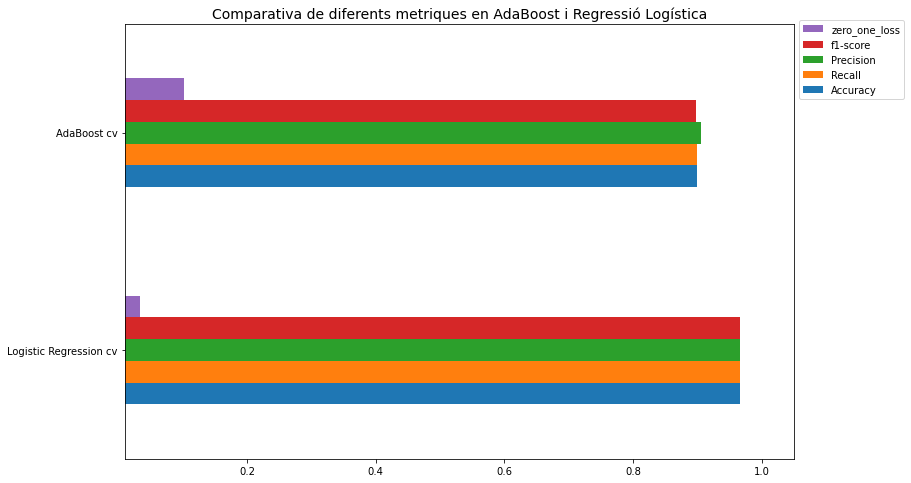

In [50]:
ax = plot_results2[['Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss']].plot(kind='barh', figsize=(12, 8))
ax.set_title('Comparativa de diferents metriques en AdaBoost i Regressió Logística', fontsize = 14)
ax.set_ylabel('')
ax.set_xlim([0.01, 1.05])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

Si mirem la precisió dels sets d'entrenament i de test en ambdos models, veiem que hi ha una diferencia en la precisió entre tots dos sets que  ens indica que molt probablement ambdos models pateixen d'overfitting, encara que al model AdaBoost és més acusat.<br>
l'overfitting més gran al model AdaBoost pot ser degut a que, en general, els models més complexos com aquest tenen més tendencia a l'overfitting que els models més simples com la regressió logística. 
De qualsevol manera l'overfitting en els dos models pot ser degut a que en haver-hi poques dades al set d'entrenament a l'algoritme li costa generalitzar i falla més quan li passem dades noves, com les del set de test.<br>
Veiem que, després de fer la validació creuada en tots dos models, es veu que al model de regressió logística hi ha una millora d'aproximadament un 2% en relació al model amb train/test en totes les métriques i, en canvi, a l'AdaBoost empitjora en totes també en un 4.5%.<br>
Per a datasets amb poques dades, com amb el que estem treballant, el métode cross validation obté prediccions més precises que no pas el train/test, així doncs, el model de regressió logística en obtenir unes millors métriques en general amb aquest métode que no pas l'AdaBosst i en ser aquestes més semblants a les obtingudes en el train/test, ens ve a dir que la regressió logística seria el model que hauriem d'escollir en aquest cas.

### - Exercici 5

Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandarització, mostreig...).

#### Logistic Regression

In [52]:
# Escollim la variable objectiu
y = data['Class']
# Escollim les variables independents treient la variable objectiu.
# X = data.drop(columns='Class')
X = data.drop(['Class'], axis = 1)

A continuació dividirem les dades en un set d'entrenament i un altre de test en proporció 80% i 20%

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

Estandaritzem les dades

In [54]:
scalar=StandardScaler()
X_train_st = scalar.fit_transform(X_train)
X_test_st =scalar.fit_transform(X_test)

In [55]:
print('X_train.shape: ', X_train_st.shape)
print('X_test.shape: ', X_test_st.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (141, 13)
X_test.shape:  (36, 13)
y_train.shape:  (141,)
y_test.shape:  (36,)


Fem el model de regressió logística i l'entrenem amb les dades del set d'entrenament.

In [56]:
clf_st =  LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
 
clf_st.fit(X_train_st, y_train)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

A continuació comprovarem quina precisió ens dona tant el set d'entrenament com el de test.

In [57]:
score_st = clf_st.score(X_train_st,y_train)*100
print("Precisió del set d'entrenament: ", round(score_st,4), "%")

preds_st = clf_st.predict(X_test_st) 
score_pred_st = accuracy_score(y_test, preds_st)*100
print("Precisió del set de test: ", round(score_pred_st,4), "%")

Precisió del set d'entrenament:  100.0 %
Precisió del set de test:  97.2222 %


Veiem que la precissió del test d'entrenament és  del 100% mentres que la del set de test es del 97%, o sigui que ja ens ha millorat notablement respecte al model amb les dades sense estandaritzar, gairebé un 3% en el cas del set de test.

Ara farem un informe que ens mostrarà algunes mètriques segmentades segons la classe:

In [58]:
target_names = ['classe 1', 'classe 2', 'classe 3']
print(classification_report(y_test, preds_st, target_names=target_names))

              precision    recall  f1-score   support

    classe 1       1.00      0.93      0.96        14
    classe 2       0.94      1.00      0.97        15
    classe 3       1.00      1.00      1.00         7

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [59]:
print_results(y_test, preds_st)

Accuracy :  0.9722222222222222
Recall (or sensitivity):  0.9722222222222222
F1 score:  0.9721558476038763
Precision :  0.9739583333333334
zero_one_loss 0.02777777777777779


Comprovem com totes les métriques han millorat força amb l'estandarització de les dades, incloent-hi la perdua, que ha baixat de 5.5 a 2.7. O sigui que hauriem de tenir millors prediccions i al mateix temps una taxa d'error en aquestes menor.

In [60]:
log_matrix_st = confusion_matrix(y_test, preds_st)
print('Matriu de Confusió:')
print(log_matrix_st)

Matriu de Confusió:
[[13  1  0]
 [ 0 15  0]
 [ 0  0  7]]


In [61]:
print_confusion_matrix(y_test, preds_st)

Clase 1 Verdaders =  13
clase 2 Verdaders =  15
Clase 3 Verdaders =  7
Clase 1 Fals =  0
clase 2 Fals =  1
Clase 3 Fals =  0


Podem veure que després de fer la matriu de confusió, ens dona tan sols 1 fals, mentre que en el model sense estandaritzar hi sortien 2.

In [62]:
results_df_st = pd.DataFrame(data= [['Logistic Regression Standard',  get_results(y_test, preds_st)[0],
                                  get_results(y_test, preds_st)[1],  get_results(y_test, preds_st)[2], 
                                  get_results(y_test, preds_st)[3], get_results(y_test, preds_st)[4]]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss'])

results_df_st

,Model,Accuracy,Recall,Precision,f1-score,zero_one_loss
0,Logistic Regression Standard,0.972222,0.972222,0.973958,0.972156,0.027778


#### AdaBoost

In [63]:
ada_st = AdaBoostClassifier(random_state=0, n_estimators=100)

ada_st.fit(X_train_st, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

A continuació mirarem quina precisió ens dona.

In [64]:
score_st = ada_st.score(X_train_st,y_train) 
print("Precisió del set d'entrenament: ", score_st*100, "%")

ada_pred_st = ada_st.predict(X_test_st)
score_pred_st = accuracy_score(y_test, ada_pred_st) 
print("Precisió del set de test: ", score_pred_st*100, "%")

Precisió del set d'entrenament:  99.29078014184397 %
Precisió del set de test:  94.44444444444444 %


In [65]:
print_results(y_test, ada_pred_st)

Accuracy :  0.9444444444444444
Recall (or sensitivity):  0.9444444444444444
F1 score:  0.9438651705893084
Precision :  0.9497685185185184
zero_one_loss 0.05555555555555558


Veiem que les metriques queden pràcticament iguals després de l'estandarització. Només hi ha una petita millora de 0.35% en la precisió i un gairebé imperceptible 0.001% al f1-score. 

Ara farem un informe que ens mostrarà algunes mètriques segmentades segons la classe:

In [66]:
target_names = ['classe 1', 'classe 2', 'classe 3']
print(classification_report(y_test, ada_pred_st, target_names=target_names))

              precision    recall  f1-score   support

    classe 1       0.93      1.00      0.97        14
    classe 2       1.00      0.87      0.93        15
    classe 3       0.88      1.00      0.93         7

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



In [67]:
ada_matrix_st = confusion_matrix(y_test, ada_pred_st)
print('Matriu de Confusió:')
print(ada_matrix_st)

Matriu de Confusió:
[[14  0  0]
 [ 1 13  1]
 [ 0  0  7]]


In [68]:
print_confusion_matrix(y_test, ada_pred_st)

Clase 1 Verdaders =  14
clase 2 Verdaders =  13
Clase 3 Verdaders =  7
Clase 1 Fals =  1
clase 2 Fals =  0
Clase 3 Fals =  1


De la mateixa manera que en el model anterior, obtenim 34 resultats correctes i  2 incorrectes. Per lo que no ens ha millorat la predicció. 

In [69]:
results_df_st2 = pd.DataFrame(data= [['AdaBoost Standard',  get_results(y_test, ada_pred_st)[0],
                                  get_results(y_test, ada_pred_st)[1],  get_results(y_test, ada_pred_st)[2], 
                                  get_results(y_test, ada_pred_st)[3], get_results(y_test, ada_pred_st)[4]]], columns = ['Model', 
                                   'Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss'])
results_df_st = pd.concat([results_df_st, results_df_st2])
results_df_st2

,Model,Accuracy,Recall,Precision,f1-score,zero_one_loss
0,AdaBoost Standard,0.944444,0.944444,0.949769,0.943865,0.055556


Finalment compararem les metriques dels dos models amb les dades originals envers les estandaritzades.

In [70]:
results_df_st = pd.concat([results_df_st, results_df])

In [71]:
results_df_st

,Model,Accuracy,Recall,Precision,f1-score,zero_one_loss
0,Logistic Regression Standard,0.972222,0.972222,0.973958,0.972156,0.027778
0,AdaBoost Standard,0.944444,0.944444,0.949769,0.943865,0.055556
0,Logistic Regression,0.944444,0.944444,0.944444,0.944444,0.055556
0,AdaBoost,0.944444,0.944444,0.946296,0.943855,0.055556


In [72]:
plot_results3 = results_df_st.set_index('Model')

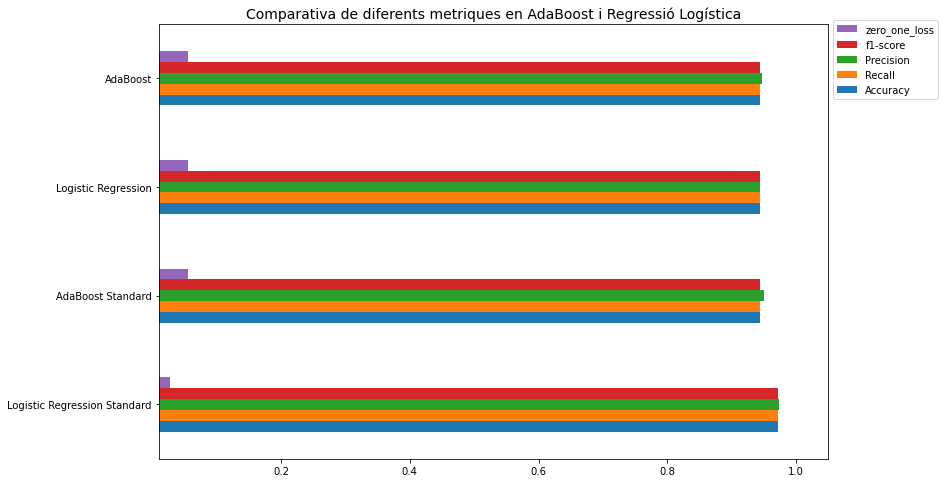

In [73]:
ax = plot_results3[['Accuracy', 'Recall', 'Precision', 'f1-score', 'zero_one_loss']].plot(kind='barh', figsize=(12, 8))
ax.set_title('Comparativa de diferents metriques en AdaBoost i Regressió Logística', fontsize = 14)
ax.set_ylabel('')
ax.set_xlim([0.01, 1.05])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1.02)); 

Si comparem els dos models abans i després de l'estandarizació de les dades, podem veure clarament com el model de regressió ha millorat notablement en totes les mètriques, mentres que el model AdaBoost ha restat gairebé igual, amb només 2 metriques que han millorat molt poc. 
Així doncs per finalitzar, en aquest cas en concret, el model de regressió logística és el que hauriem d'escollir, doncs després de tractar les dades arriba a un percentatge en les prediccions molt elevat que el model AdaBoost no ha pogut igualar i al mateix temps amb una perdua menor que ens farà obtenir unes prediccions amb menys errors.